In [8]:
import pandas as pd
from shapely.geometry import Point, Polygon,LineString
import matplotlib.pyplot as plt
import geopandas as gpd 
import numpy as np
import json


In [9]:
arr = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/arrondissementsParis.csv", sep=",")
cpt_traffic = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/comptage_Traffic.csv", sep=";")
cpt_velo = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/comptage_Velo.csv", sep=",")
carb = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/Prix_carburant2022Paris.csv", sep=";")

In [10]:
df_arr=arr.copy()
df_arr["X"]=df_arr["X"].str.replace(",", ".")
df_arr["Y"]=df_arr["Y"].str.replace(",", ".")

all_geo = [json.loads(str(item))['coordinates'][0] for item in df_arr["Geometry"]]
df_arr["geo_shape_list"] = all_geo
df_arr["geo_shape_list"] = df_arr["geo_shape_list"].apply(Polygon)
df_arr = gpd.GeoDataFrame(df_arr, geometry = df_arr["geo_shape_list"], crs="EPSG:4326")
df_arr["ville"] = "Paris"
df_arr = df_arr[["id_arr", "ville", "Numéro d’arrondissement INSEE", "Numéro d’arrondissement","Numéro d’arrondissement INSEE", "Nom officiel de l’arrondissement", "Surface", "X", "Y", "geometry"]].rename(columns={"Numéro d’arrondissement": "num_arr", "Numéro d’arrondissement INSEE": "code_insee", "Nom officiel de l’arrondissement" : "nom_arr", "Surface":"surfce_arr", "X":"lat", "Y":"lon"})

df_arr.to_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/DW/Tables/arrondissement.csv", index=False)

In [4]:
df_traff = cpt_traffic.copy()
df_traff = df_traff[["Identifiant arc","lat","long","geo_shape"]]
df_traff=df_traff.drop_duplicates().reset_index(drop=True)
df_traff=df_traff[df_traff['geo_shape'].notna()].reset_index(drop=True)

all_geo = [json.loads(str(item))['coordinates'] for item in df_traff["geo_shape"]]
df_traff["geo_shape_list"] = all_geo
df_traff["geo_shape_list"] = df_traff["geo_shape_list"].apply(LineString)

df_traff = gpd.GeoDataFrame(df_traff, geometry = df_traff["geo_shape_list"], crs="EPSG:4326")
df_traff["type_install"]="cpt_traffic"
df_traff = df_traff[["Identifiant arc", "type_install", "lat", "long", "geometry"]].rename(columns={"Identifiant arc":"id_type_install", "long":"lon"})
len(df_traff)

3484

In [11]:
df_cpt_velo = cpt_velo.copy()
df_cpt_velo = df_cpt_velo[["Identifiant du compteur","Nom du site de comptage","Coordonnées géographiques"]]
df_cpt_velo=df_cpt_velo.drop_duplicates()
df_cpt_velo[['lat','lon']] = df_cpt_velo["Coordonnées géographiques"].str.split(",",expand=True)
df_cpt_velo = gpd.GeoDataFrame(df_cpt_velo, geometry = gpd.points_from_xy(df_cpt_velo["lon"], df_cpt_velo["lat"]), crs="EPSG:4326")
df_cpt_velo["type_install"]="cpt_velo"
df_cpt_velo = df_cpt_velo[["Identifiant du compteur", "type_install", "lat", "lon", "geometry"]].rename(columns={"Identifiant du compteur":"id_position"})
len(df_cpt_velo)

99

In [6]:
df_carburant = carb.copy()
df_carburant = df_carburant[["id_station","latitude","longitude","adresse","cp"]]
df_carburant=df_carburant.drop_duplicates()
df_carburant["latitude"] = df_carburant["latitude"]/100000
df_carburant["longitude"] = df_carburant["longitude"]/100000
df_carburant = gpd.GeoDataFrame(df_carburant, geometry = gpd.points_from_xy(df_carburant["longitude"], df_carburant["latitude"]), crs="EPSG:4326")
df_carburant["type_install"]="station_carburant"
df_carburant = df_carburant[["id_station", "type_install", "latitude", "longitude", "geometry"]].rename(columns={"id_station":"id_type_install", "longitude":"lon", "latitude":"lat"})
len(df_carburant)

48

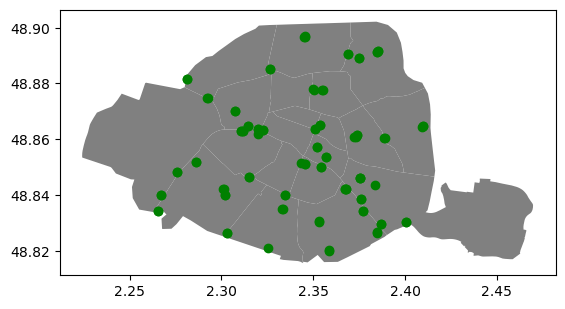

In [12]:
arr_ = df_arr["geometry"]
#traff_ = df_traff["geometry"]
velo_ = df_cpt_velo["geometry"]
#carb_ = df_carburant["geometry"]

p_arr = gpd.GeoSeries(arr_)
#p_traff = gpd.GeoSeries(traff_)
p_velo = gpd.GeoSeries(velo_)
#p_carb = gpd.GeoSeries(carb_)

fig, ax = plt.subplots()
p_arr.plot(ax=ax, color="grey")
#p_traff.plot(ax = ax, color="pink")
p_velo.plot(ax = ax, color="green")
#p_carb.plot(ax = ax)

plt.show()

In [18]:


df_cpt_velo=df_cpt_velo.drop_duplicates(subset=['id_position']).reset_index(drop=True)
df_cpt_velo

,id_position,type_install,lat,lon,geometry
0,100003096-353242251,cpt_velo,48.83504,2.33314,POINT (2.33314 48.83504)
1,100003097-101003097,cpt_velo,48.87773,2.3506,POINT (2.35060 48.87773)
2,100003098-101003098,cpt_velo,48.83505,2.33333,POINT (2.33333 48.83505)
3,100003099-353242239,cpt_velo,48.87813,2.3497,POINT (2.34970 48.87813)
4,100006300-101006300,cpt_velo,48.843435,2.383378,POINT (2.38338 48.84343)
...,...,...,...,...,...
94,300014702-353245971,cpt_velo,48.83985,2.30202,POINT (2.30202 48.83985)
95,100056035-353266462,cpt_velo,48.8635,2.32239,POINT (2.32239 48.86350)
96,100056035-353266460,cpt_velo,48.8635,2.32239,POINT (2.32239 48.86350)
97,300021312-353293580,cpt_velo,48.851131,2.345678,POINT (2.34568 48.85113)


In [31]:
pos = df_cpt_velo.copy()
pos = gpd.sjoin(pos, df_arr[["id_arr", "geometry"]], how = "inner", op = 'intersects').reset_index(drop=True).drop(columns=["index_right", "type_install"])
pos["id_position"]=pos["id_position"].str.replace('-', '')
pos

C:\Users\pauli\anaconda3\envs\M2\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,id_position,lat,lon,geometry,id_arr
0,100003096353242251,48.83504,2.33314,POINT (2.33314 48.83504),6
1,100003098101003098,48.83505,2.33333,POINT (2.33333 48.83505),6
2,100047547104047547,48.82624,2.30281,POINT (2.30281 48.82624),6
3,100047547103047547,48.82624,2.30281,POINT (2.30281 48.82624),6
4,100049407353255860,48.84017,2.33438,POINT (2.33438 48.84017),6
...,...,...,...,...,...
92,100063174101063174,48.89696,2.34538,POINT (2.34538 48.89696),19
93,100063173101063173,48.896825,2.345648,POINT (2.34565 48.89682),19
94,300021320353293614,48.89683,2.34521,POINT (2.34521 48.89683),19
95,100056035353266462,48.8635,2.32239,POINT (2.32239 48.86350),8


In [32]:
pos.to_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/DW/Tables/position.csv", index=False)